In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator

In [2]:
def f(x, y):
    return x**2 + x*y + 2*y + 1

In [3]:
Nx, Ny = 21, 17
xl = np.linspace(-3, 3, Nx)
yl = np.linspace(-2, 2, Ny)

In [4]:
xl.shape

(21,)

In [5]:
yl.shape

(17,)

In [6]:
X, Y = np.meshgrid(xl, yl)

In [7]:
X.shape

(17, 21)

In [8]:
Y.shape

(17, 21)

In [9]:
Z = f(X, Y)

In [10]:
zl = np.arange(np.floor(Z.min()), np.ceil(Z.max())+1, 2)
zl

array([-4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [11]:
Z.shape

(17, 21)

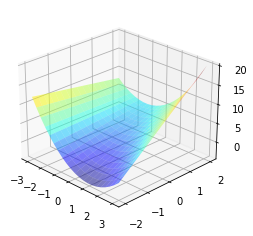

In [12]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.view_init(elev=25, azim=-45)

In [13]:
dZdy, dZdx = np.gradient(Z, yl, xl, edge_order=1)

In [14]:
dZdx.shape

(17, 21)

In [15]:
dZdy.shape

(17, 21)

In [16]:
V = np.hypot(dZdx, dZdy)

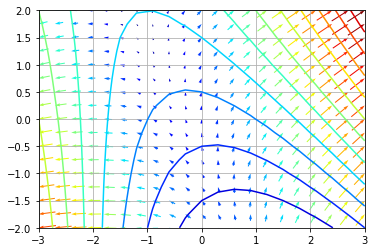

In [17]:
axe = plt.contour(X, Y, Z, zl, cmap='jet')
axe.axes.quiver(X, Y, dZdx, dZdy, V, units='x', pivot='tip', cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

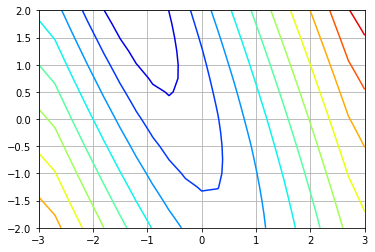

In [18]:
axe = plt.contour(X, Y, V, 10, cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

In [19]:
SdZx = np.cumsum(dZdx, axis=1)*np.diff(xl)[0]
SdZy = np.cumsum(dZdy, axis=0)*np.diff(yl)[0]

Zhat = np.zeros(SdZx.shape)
for i in range(Zhat.shape[0]):
    for j in range(Zhat.shape[1]):
        Zhat[i,j] += np.sum([SdZy[i,0], -SdZy[0,0], SdZx[i,j], -SdZx[i,0]])
        
Zhat += Z[0,0] - Zhat[0,0]

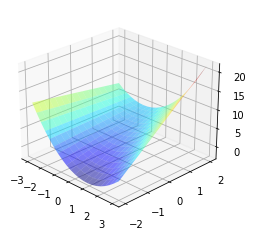

In [20]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Zhat, cmap='jet', alpha=0.5)
axe.view_init(elev=25, azim=-45)

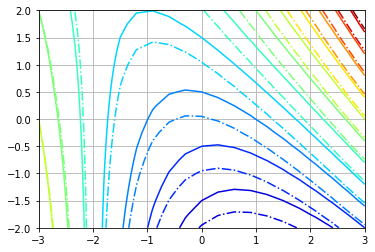

In [21]:
axe = plt.contour(X, Y, Z, zl, cmap='jet')
axe.axes.contour(X, Y, Zhat, zl, cmap='jet', linestyles='-.')
#axe.axes.quiver(X, Y, dZdx, dZdy, V, units='x', pivot='tip', cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

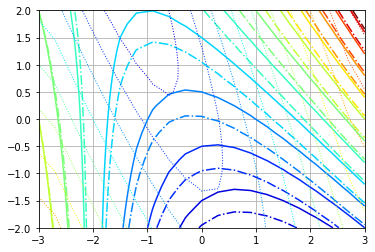

In [22]:
axe = plt.contour(X, Y, Z, zl, cmap='jet')
axe.axes.contour(X, Y, Zhat, zl, cmap='jet', linestyles='-.')
axe.axes.contour(X, Y, V, 10, cmap='jet', linewidths=1, linestyles=':')
axe.axes.set_aspect('equal')
axe.axes.grid()

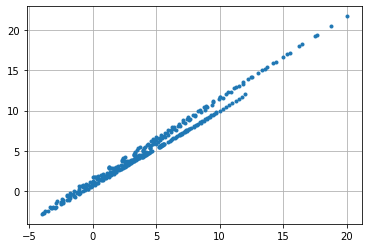

In [23]:
fig, axe = plt.subplots()
axe.plot(Z.ravel(), Zhat.ravel(), '.')
axe.grid()

In [24]:
q = np.full(dZdx.shape, False)
q[0:6,5:11] = True
q[-6:,-6:] = True
dZdx[q] = np.nan
dZdy[q] = np.nan

In [25]:
q2 = ~np.isnan(dZdx.ravel())
r = np.stack([X.ravel(), Y.ravel()]).T[q2,:]
Sx = interpolate.CloughTocher2DInterpolator(r, dZdx.ravel()[q2])
Sy = interpolate.CloughTocher2DInterpolator(r, dZdy.ravel()[q2])

In [26]:
Nx, Ny = 200, 200
xli = np.linspace(xl.min(), xl.max(), Nx)
yli = np.linspace(yl.min(), yl.max(), Nx)
Xi, Yi = np.meshgrid(xli, yli)
ri = np.stack([Xi.ravel(), Yi.ravel()]).T

In [27]:
dZdxi = Sx(ri).reshape(Xi.shape)
dZdyi = Sy(ri).reshape(Xi.shape)

In [28]:
SdZxi = np.cumsum(dZdxi, axis=1)*np.diff(xli)[0]
SdZyi = np.cumsum(dZdyi, axis=0)*np.diff(yli)[0]

Zhati = np.zeros(SdZxi.shape)
for i in range(Zhati.shape[0]):
    for j in range(Zhati.shape[1]):
        Zhati[i,j] += np.sum([SdZyi[i,0], -SdZyi[0,0], SdZxi[i,j], -SdZxi[i,0]])
        
Zhati += Z[0,0] - Zhati[0,0]

In [29]:
np.all(np.isnan(dZdxi))

False

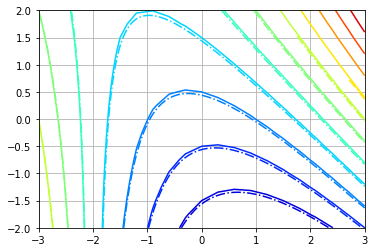

In [30]:
axe = plt.contour(X, Y, Z, zl, cmap='jet')
axe.axes.contour(Xi, Yi, Zhati, zl, cmap='jet', linestyles='-.')
#axe.axes.quiver(X, Y, dZdx, dZdy, V, units='x', pivot='tip', cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

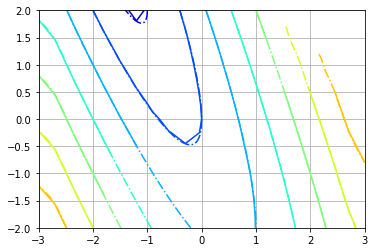

In [31]:
Vl = np.arange(0, 11, 1)
axe = plt.contour(X, Y, np.hypot(dZdx, dZdy), Vl, cmap='jet')
axe.axes.contour(Xi, Yi, np.hypot(dZdxi, dZdyi), Vl, cmap='jet', linestyles='-.')
axe.axes.set_aspect('equal')
axe.axes.grid()

In [32]:
V.max()

9.180958555619343